In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns



In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score,roc_auc_score,classification_report

In [3]:
from xgboost import  XGBRFClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [5]:
from imblearn.over_sampling import SMOTE, ADASYN

In [6]:
df = pd.read_csv("train_sem.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sem 1   1349 non-null   float64
 1   Sem 2   1349 non-null   float64
 2   Sem 3   1349 non-null   float64
 3   Sem 4   1349 non-null   float64
 4   target  1349 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 52.8 KB


In [8]:
df.columns

Index(['Sem 1', 'Sem 2', 'Sem 3', 'Sem 4', 'target'], dtype='object')

In [9]:
df.describe()

,Sem 1,Sem 2,Sem 3,Sem 4,target
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,3.169926,3.163936,3.240734,3.277569,0.919941
std,0.352375,0.461155,0.355041,0.407844,0.271486
min,0.830000,0.230000,0.550000,0.900000,0.000000
25%,3.020000,3.060000,3.110000,3.160000,1.000000
50%,3.220000,3.270000,3.300000,3.390000,1.000000
75%,3.400000,3.440000,3.460000,3.520000,1.000000
max,3.750000,4.000000,3.920000,3.910000,1.000000


In [10]:
X = df.drop("target",axis=1).values
y = df.target.values

In [11]:
df.target.value_counts(normalize=True)

1    0.919941
0    0.080059
Name: target, dtype: float64

In [12]:
df.shape

(1349, 5)

In [13]:
print(df.target.value_counts()*100/len(df))

1    91.99407
0     8.00593
Name: target, dtype: float64


In [14]:
df.apply(lambda x:len(x.unique()))

Sem 1     159
Sem 2     193
Sem 3     169
Sem 4     176
target      2
dtype: int64

In [15]:
(df == 0).sum()

Sem 1       0
Sem 2       0
Sem 3       0
Sem 4       0
target    108
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014401579848>,
      dtype=object)

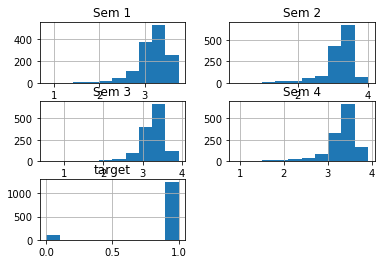

In [16]:
df.hist(bins=10)

In [17]:
corr = df.corr()
c2 = corr.abs().unstack()
c2.sort_values(ascending=False)


Sem 1   Sem 1     1.000000
Sem 2   Sem 2     1.000000
Sem 4   Sem 4     1.000000
Sem 3   Sem 3     1.000000
target  target    1.000000
Sem 1   Sem 2     0.585234
Sem 2   Sem 1     0.585234
Sem 3   Sem 4     0.562066
Sem 4   Sem 3     0.562066
Sem 1   Sem 3     0.487193
Sem 3   Sem 1     0.487193
Sem 2   Sem 3     0.430978
Sem 3   Sem 2     0.430978
Sem 1   Sem 4     0.428000
Sem 4   Sem 1     0.428000
Sem 2   Sem 4     0.407784
Sem 4   Sem 2     0.407784
target  Sem 3     0.237888
Sem 3   target    0.237888
Sem 4   target    0.195084
target  Sem 4     0.195084
        Sem 1     0.189770
Sem 1   target    0.189770
target  Sem 2     0.153142
Sem 2   target    0.153142
dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [19]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [20]:
scaler = StandardScaler()

In [21]:
scale  = scaler.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled  = scale.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(random_state=0, n_estimators=200,\
    criterion='entropy',max_leaf_nodes=20,oob_score=False, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20, n_estimators=200,
                       n_jobs=-1, random_state=0)

In [73]:

lr = LogisticRegression(max_iter=100,penalty='l2',
        solver='newton-cg',
        random_state=0,
        )
lr.fit(X_train_scaled, y_train,sample_weight=np.where(y_train==0,0.8,0.90))


LogisticRegression(random_state=0, solver='newton-cg')

In [74]:
y_pred = lr.predict(X_test_scaled)
auc = roc_auc_score(y_test, y_pred)
auc

0.7370689655172413

In [75]:
y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.18      0.72      0.29        29
           1       0.97      0.75      0.85       376

    accuracy                           0.75       405
   macro avg       0.58      0.74      0.57       405
weighted avg       0.92      0.75      0.81       405



In [76]:
roc_auc_score(y_test,y_pred_lr)

0.7370689655172413

In [27]:
y_pred = rf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred)

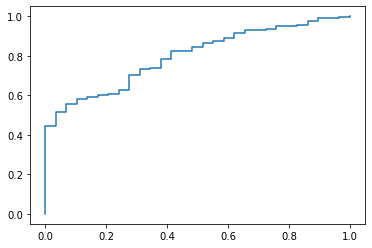

In [28]:
plt.plot(fpr, tpr,label="AUC="+str(auc))
plt.show()

In [29]:
auc

0.7977806309611151

In [30]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.93      1.00      0.96       376

    accuracy                           0.93       405
   macro avg       0.46      0.50      0.48       405
weighted avg       0.86      0.93      0.89       405



C:\Users\talk2\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talk2\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talk2\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
